In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cancer-prediction-dataset/The_Cancer_data_1500_V2.csv


In [58]:
import pandas as pd
x=pd.read_csv("/kaggle/input/cancer-prediction-dataset/The_Cancer_data_1500_V2.csv")
x

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


In [59]:
#now lets see correlation between the variables
x.corr()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
Age,1.000000,0.007145,0.030246,-0.013914,-0.027025,0.016396,0.003209,-0.010996,0.196603
Gender,0.007145,1.000000,-0.012516,0.035384,-0.004674,0.023401,0.009723,0.007657,0.250336
BMI,0.030246,-0.012516,1.000000,-0.012616,0.011392,0.011480,0.004711,-0.010824,0.187560
Smoking,-0.013914,0.035384,-0.012616,1.000000,-0.021039,-0.043817,-0.001660,0.016368,0.226999
GeneticRisk,-0.027025,-0.004674,0.011392,-0.021039,1.000000,-0.039721,-0.016864,-0.010833,0.253472
PhysicalActivity,0.016396,0.023401,0.011480,-0.043817,-0.039721,1.000000,0.033856,0.018136,-0.150089
AlcoholIntake,0.003209,0.009723,0.004711,-0.001660,-0.016864,0.033856,1.000000,0.055403,0.212772
CancerHistory,-0.010996,0.007657,-0.010824,0.016368,-0.010833,0.018136,0.055403,1.000000,0.392188
Diagnosis,0.196603,0.250336,0.187560,0.226999,0.253472,-0.150089,0.212772,0.392188,1.000000


In [60]:
#now lets make a deep learning model taking the 8 parameters 
first_train=[]

second_train=[]
second_y_train=[]
first_y_train=[]


test_case=[]
test_y_case=[]
import math 
a=math.floor(len(x)*0.8)
for i in range(a):
    l=[]
    for j in x.columns:
        if j!='Diagnosis':
            l.append(x[j][i])
        if j=='Diagnosis':
            if x[j][i]==0:
                first_train.append(l)
                first_y_train.append(0)
            if x[j][i]==1:
                second_train.append(l)
                second_y_train.append(1)
                
for i in range(a,len(x)):
    l=[]
    for j in x.columns:
        if j!='Diagnosis':
            l.append(x[j][i])
        if j=='Diagnosis':
            test_case.append(l)
            test_y_case.append(x[j][i])
            
print(len(first_y_train))
print(len(second_y_train))
print(len(first_train))
print(len(second_train))

print(len(test_case))
print(len(test_y_case))
    
                
            

774
426
774
426
300
300


In [61]:
#what we do is we train the deep learning model for different genders 
#first we import all the dependencies 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.layers import Flatten,Input,Dense,BatchNormalization,Dropout
from keras.utils import plot_model
from keras.models import Model

input=Input((8,))
dense_1=Dense(8,activation='relu')(input)
dense_2=Dense(16,activation='relu')(dense_1)
dense_4=Dense(32,activation='relu')(dense_2)
batch_norm=BatchNormalization()(dense_4)
dense_5=Dense(64,activation='relu')(batch_norm)
dropout=Dropout(0.2)(dense_5)
dense_6=Dense(128,activation='relu')(dropout)
dense_7=Dense(256,activation='relu')(dense_6)
dense_8=Dense(512,activation='relu')(dense_7)
dense_9=Dense(1024,activation='relu')(dense_8)
dense_10=Dense(512,activation='relu')(dense_9)
dense_11=Dense(256,activation='relu')(dense_10)
dense_12=Dense(128,activation='relu')(dense_11)
dense_13=Dense(64,activation='relu')(dense_12)
dense_14=Dense(32,activation='relu')(dense_13)
dense_15=Dense(16,activation='relu')(dense_14)
output=Dense(1,activation='sigmoid')(dense_15)

first_model=Model(inputs=input,outputs=output)
first_model.summary()

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_214 (Dense)               │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_215 (Dense)               │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_216 (Dense)               │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_217 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_218 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_219 (Dense)               │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_220 (Dense)               │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_221 (Dense)               │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_222 (Dense)               │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_223 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_224 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_225 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_226 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_227 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_228 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,401,145 (5.34 MB)

 Trainable params: 1,401,081 (5.34 MB)

 Non-trainable params: 64 (256.00 B)

In [62]:
#here we define for the second model 
dense_1=Dense(8,activation='relu')(input)
dense_2=Dense(16,activation='relu')(dense_1)
dense_4=Dense(32,activation='relu')(dense_2)
batch_norm=BatchNormalization()(dense_4)
dense_5=Dense(64,activation='relu')(batch_norm)
dropout=Dropout(0.2)(dense_5)
dense_6=Dense(128,activation='relu')(dropout)
dense_7=Dense(256,activation='relu')(dense_6)
dense_8=Dense(512,activation='relu')(dense_7)
dense_9=Dense(1024,activation='relu')(dense_8)
dense_10=Dense(512,activation='relu')(dense_9)
dense_11=Dense(256,activation='relu')(dense_10)
dense_12=Dense(128,activation='relu')(dense_11)
dense_13=Dense(64,activation='relu')(dense_12)
dense_14=Dense(32,activation='relu')(dense_13)
dense_15=Dense(16,activation='relu')(dense_14)
output1=Dense(1,activation='sigmoid')(dense_15)

second_model=Model(inputs=input,outputs=output1)
second_model.summary()

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_229 (Dense)               │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_230 (Dense)               │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_231 (Dense)               │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_232 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_233 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_234 (Dense)               │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_235 (Dense)               │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_236 (Dense)               │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_237 (Dense)               │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_238 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_239 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_240 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_241 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_242 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_243 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,401,145 (5.34 MB)

 Trainable params: 1,401,081 (5.34 MB)

 Non-trainable params: 64 (256.00 B)

In [80]:
from tensorflow.keras.layers import concatenate 
#here we would concatenate the readings of the two models
concat=concatenate([first_model.output,second_model.output])
dense_combined=Dense(1,activation='softmax')(concat)



# Combined model
combined_model = Model(inputs=[first_model.input, second_model.input], outputs=dense_combined)
combined_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])



In [81]:
from tensorflow.keras.optimizers import Adam

first_model.compile(metrics=['accuracy'], loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001))


In [82]:
import numpy as np
first_train=np.asarray(first_train)
first_y_train=np.asarray(first_y_train)
second_train=np.asarray(second_train)
second_y_train=np.asarray(second_y_train)

In [66]:
first_model.fit(first_train,first_y_train,verbose=1,epochs=20,batch_size=5)

Epoch 1/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9520 - loss: 0.1137
Epoch 2/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 11/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00
E

In [67]:
second_model.compile(metrics=['accuracy'], loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001))


In [68]:
second_model.fit(second_train,second_y_train,verbose=1,epochs=20,batch_size=5 )

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 1.0000 - loss: 0.0939
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 7.5512e-40
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 2.1910e-37
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 2.8435e-39
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 9.4138e-40
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 4.2051e-40
Epoch 12/20
86/86 ━━━━━

In [77]:
#after training the standalone models we use the combined model  for evaluating  the model 
#first lets print the summary of the model 
combined_model.summary()


Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_214 (Dense)   │ (None, 8)         │         72 │ input_layer_14[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_229 (Dense)   │ (None, 8)         │         72 │ input_layer_14[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_215 (Dense)   │ (None, 16)        │        144 │ dense_214[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_230 (Dense)   │ (None, 16)        │        144 │ dense_229[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_216 (Dense)   │ (None, 32)        │        544 │ dense_215[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_231 (Dense)   │ (None, 32)        │        544 │ dense_230[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_216[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_231[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_217 (Dense)   │ (None, 64)        │      2,112 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_232 (Dense)   │ (None, 64)        │      2,112 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 64)        │          0 │ dense_217[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 64)        │          0 │ dense_232[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_218 (Dense)   │ (None, 128)       │      8,320 │ dropout_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_233 (Dense)   │ (None, 128)       │      8,320 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_219 (Dense)   │ (None, 256)       │     33,024 │ dense_218[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_234 (Dense)   │ (None, 256)       │     33,024 │ dense_233[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_220 (Dense)   │ (None, 512)       │    131,584 │ dense_219[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_235 (Dense)   │ (None, 512)       │    131,584 │ dense_234[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_221 (Dense)   │ (None, 1024)      │    525,312 │ dense_220[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_236 (Dense)   │ (None, 1024)      │    525,312 │ dense_235[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_222 (Dense)   │ (None, 512)       │    524,800 │ dense_221[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_237 (Dense)   │ (None, 512)       │    524,800 │ dense_236[0][0] 

 Total params: 2,802,293 (10.69 MB)

 Trainable params: 2,802,165 (10.69 MB)

 Non-trainable params: 128 (512.00 B)

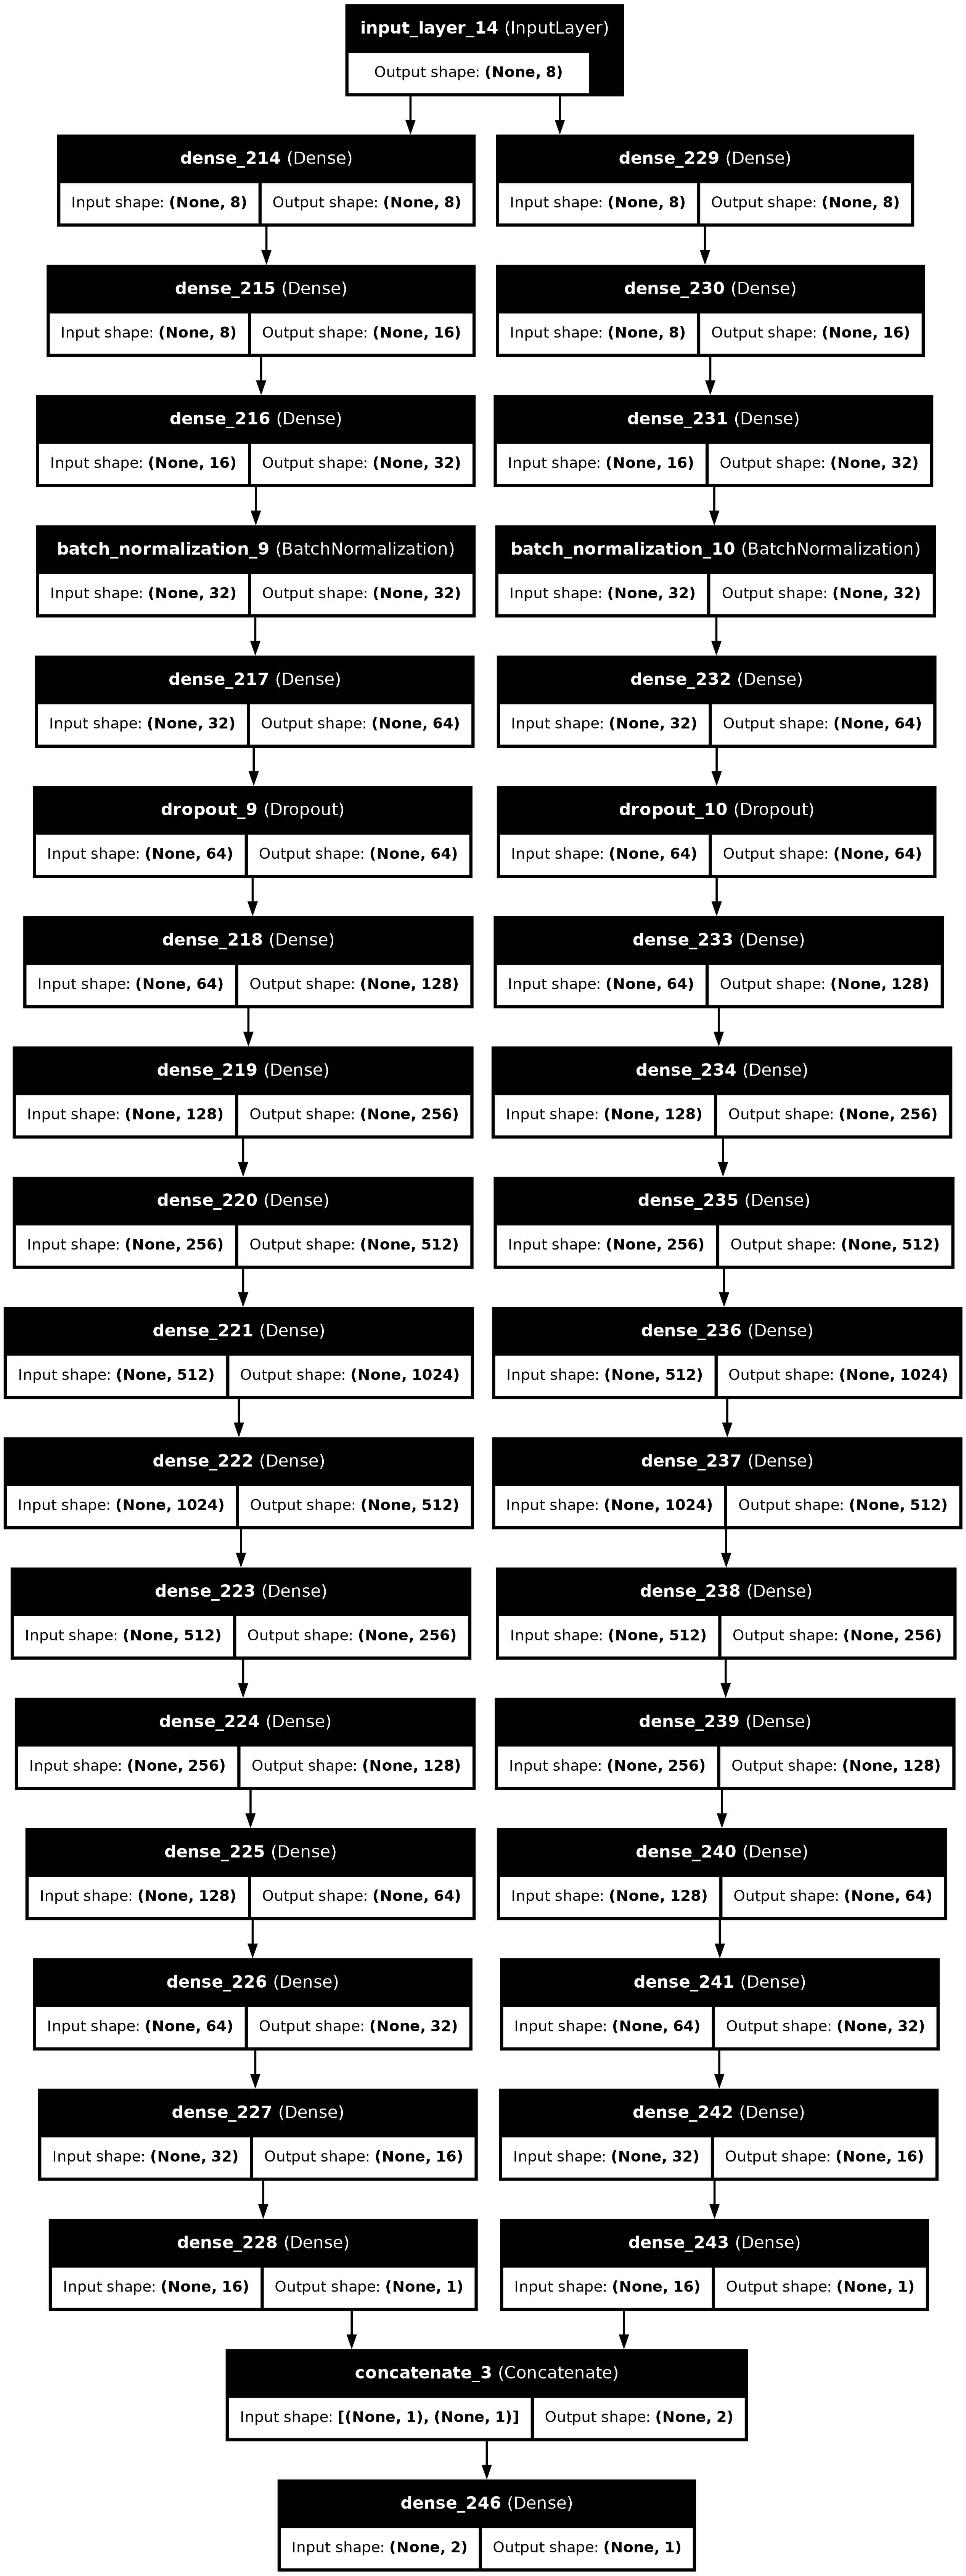

In [83]:
from keras.utils import plot_model
plot_model(combined_model,show_layer_names=True,show_shapes=True)


In [84]:
print(len(test_case))
print(len(test_y_case))

300
300


In [ ]:
import numpy as np
test_case=np.asarray(test_case)
test_y_case=np.asarray(test_y_case)

test_case1 = test_case
test_case2 = test_case

test_case1=np.asarray(test_case1)
test_case2=np.asarray(test_case2)
# Ensure that the inputs are provided as a list to the evaluate method
test_inputs = [test_case1, test_case2]

combined_model.evaluate(test_inputs,test_y_case,verbose=1)